# Xns11 - Basic reading and plotting of cross sections

#### Opening files and finding cross sections.

In [1]:
import mikeio1d

xns = mikeio1d.open("../tests/testdata/mikep_cs_demo.xns11")
xns

<mikeio1d.Xns11 (103)>

In [2]:
# How many cross sections in the file?
len(xns)

103

In [3]:
# You can index specific cross sections using their location id, chainage, and topo id.
# For example, to access the cross section at location 'basin_left1', chainage '122.042', and topo id '1':
xns["basin_left1", "122.042", "1"]

<CrossSection: basin_left1, 122.042, 1>

In [4]:
# Alternatively, you can use 'sel()' method to be more explicit (however without autocompletion):
xns.sel(location_id="basin_left1", chainage="122.042", topo_id="1")

<CrossSection: basin_left1, 122.042, 1>

In [5]:
# Use ':' or '...' as a wildcard to get a list of CrossSection objects matching the specified criteria.
xns["basin_left1", :, "1"]

[<CrossSection: basin_left1, 2.004, 1>,
 <CrossSection: basin_left1, 33.774, 1>,
 <CrossSection: basin_left1, 80.945, 1>,
 <CrossSection: basin_left1, 122.042, 1>,
 <CrossSection: basin_left1, 166.107, 1>,
 <CrossSection: basin_left1, 184.886, 1>,
 <CrossSection: basin_left1, 210.212, 1>,
 <CrossSection: basin_left1, 264.614, 1>,
 <CrossSection: basin_left1, 284.638, 1>,
 <CrossSection: basin_left1, 341.152, 1>,
 <CrossSection: basin_left1, 413.617, 1>,
 <CrossSection: basin_left1, 481.451, 1>]

In [6]:
# You can also provide fewer arguments and the remaining ones will automatically use '...'.
# For example, xns.xsections['basin_left1', ..., ...] can be more concisely expressed as:
xns["basin_left1"]

[<CrossSection: basin_left1, 2.004, 1>,
 <CrossSection: basin_left1, 33.774, 1>,
 <CrossSection: basin_left1, 80.945, 1>,
 <CrossSection: basin_left1, 122.042, 1>,
 <CrossSection: basin_left1, 166.107, 1>,
 <CrossSection: basin_left1, 184.886, 1>,
 <CrossSection: basin_left1, 210.212, 1>,
 <CrossSection: basin_left1, 264.614, 1>,
 <CrossSection: basin_left1, 284.638, 1>,
 <CrossSection: basin_left1, 341.152, 1>,
 <CrossSection: basin_left1, 413.617, 1>,
 <CrossSection: basin_left1, 481.451, 1>]

In [7]:
# Or with the 'sel()' method:
xns.sel(location_id="basin_left1")

[<CrossSection: basin_left1, 2.004, 1>,
 <CrossSection: basin_left1, 33.774, 1>,
 <CrossSection: basin_left1, 80.945, 1>,
 <CrossSection: basin_left1, 122.042, 1>,
 <CrossSection: basin_left1, 166.107, 1>,
 <CrossSection: basin_left1, 184.886, 1>,
 <CrossSection: basin_left1, 210.212, 1>,
 <CrossSection: basin_left1, 264.614, 1>,
 <CrossSection: basin_left1, 284.638, 1>,
 <CrossSection: basin_left1, 341.152, 1>,
 <CrossSection: basin_left1, 413.617, 1>,
 <CrossSection: basin_left1, 481.451, 1>]

In [8]:
# Get a nice overview of the collection as a pandas DataFrame.
xns.to_dataframe()

cross_section
location_id chainage topo_id                                                 
basin_left1 2.004    1                  <CrossSection: basin_left1, 2.004, 1>
            33.774   1                 <CrossSection: basin_left1, 33.774, 1>
            80.945   1                 <CrossSection: basin_left1, 80.945, 1>
            122.042  1                <CrossSection: basin_left1, 122.042, 1>
            166.107  1                <CrossSection: basin_left1, 166.107, 1>
...                                                                       ...
tributary   250.000  tributary  <CrossSection: tributary, 250.000, tributary>
            300.000  tributary  <CrossSection: tributary, 300.000, tributary>
            400.000  tributary  <CrossSection: tributary, 400.000, tributary>
            450.000  tributary  <CrossSection: tributary, 450.000, tributary>
            500.000  tributary  <CrossSection: tributary, 500.000, tributary>

[103 rows x 1 columns]

In [9]:
# You can access some basic properties of the collection:
print(xns.location_ids)
print(xns.chainages)
print(xns.topo_ids)

{'link_basin_left', 'river', 'link_basin_right', 'basin_left2', 'basin_right', 'tributary', 'basin_left1'}
{'0.000', '54500.000', '80.945', '130.000', '200.000', '53450.000', '159.062', '182.271', '434.188', '41.930', '520.410', '250.000', '54100.000', '54600.001', '53250.000', '53950.000', '53300.001', '53900.000', '18.000', '100.000', '341.557', '54850.000', '54400.000', '300.000', '403.762', '53745.338', '53150.000', '80.400', '54800.000', '54550.000', '28.000', '712.468', '450.000', '122.513', '29.194', '55100.000', '400.000', '53500.000', '53126.750', '50.000', '636.389', '398.991', '662.699', '166.107', '214.431', '122.042', '210.212', '436.489', '120.000', '55050.000', '567.166', '481.451', '54650.000', '284.638', '54150.000', '54812.900', '53763.578', '33.774', '238.800', '53798.128', '53693.640', '264.614', '343.386', '53550.000', '54200.000', '90.000', '281.473', '53350.000', '54950.000', '184.886', '150.000', '54750.000', '54050.000', '69.014', '30.000', '46.000', '2.004', '

### Reading and plotting cross sections

In [10]:
# Access the raw data of a cross section using the 'raw' attribute, which returns a Pandas DataFrame.
df = xns["basin_left1", "481.451", "1"].raw
df.head()

,markers,marker_labels,x,z,resistance
0,1,Left Levee Bank (1),0.000,60.049,25.0
1,,,0.999,59.997,25.0
2,,,1.998,59.957,25.0
3,,,2.997,59.918,25.0
4,,,3.996,59.862,25.0


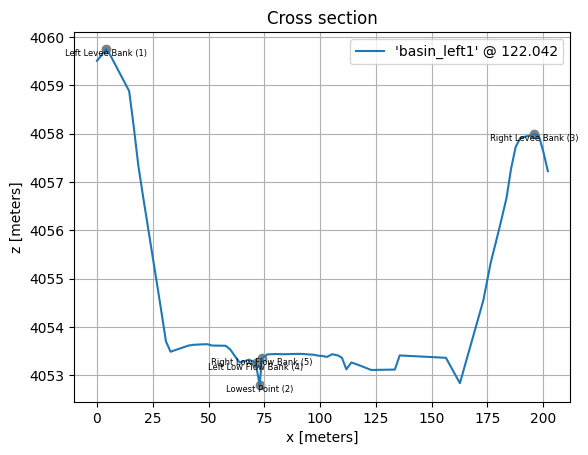

In [11]:
# Plot the cross section.
ax = xns["basin_left1", "122.042", "1"].plot()

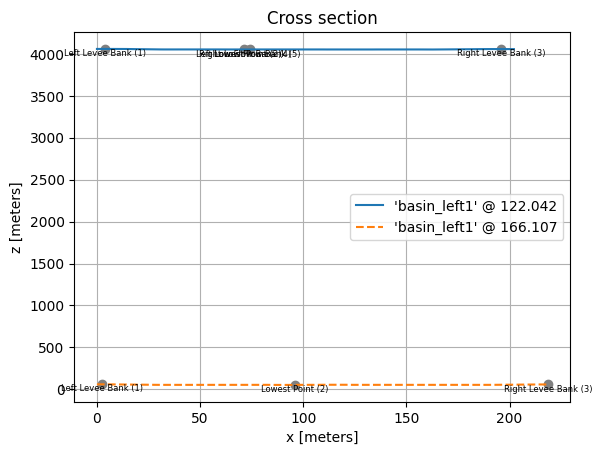

In [12]:
# Plot another cross section on the same axis.
ax = xns["basin_left1", "166.107", "1"].plot(ax=ax, linestyle="--")
ax.figure

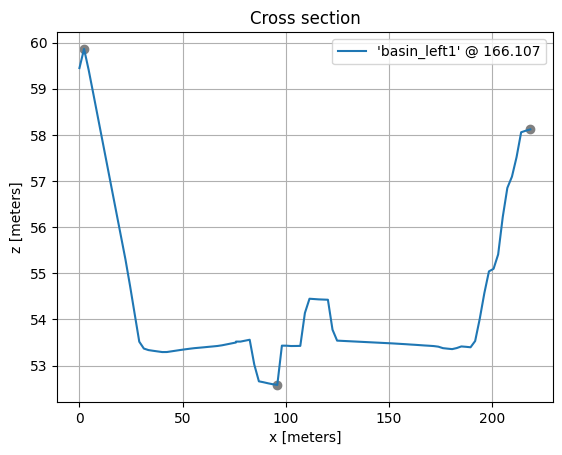

In [13]:
# Turn off marker labels if it gets too crowded.
ax = xns["basin_left1", "166.107", "1"].plot(with_marker_labels=False)

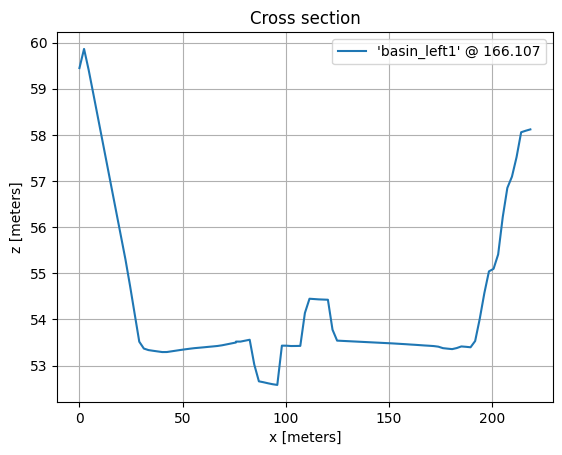

In [14]:
# Or turn off markers completely.
ax = xns["basin_left1", "166.107", "1"].plot(with_markers=False)

### Creating subsets of Xns11 objects

In [15]:
# You can create a new Xns11 object from a subset of the original collection.
from mikeio1d import Xns11

new_xns11 = Xns11(xns.sel(location_id="basin_left1"))
new_xns11

<mikeio1d.Xns11 (12)>

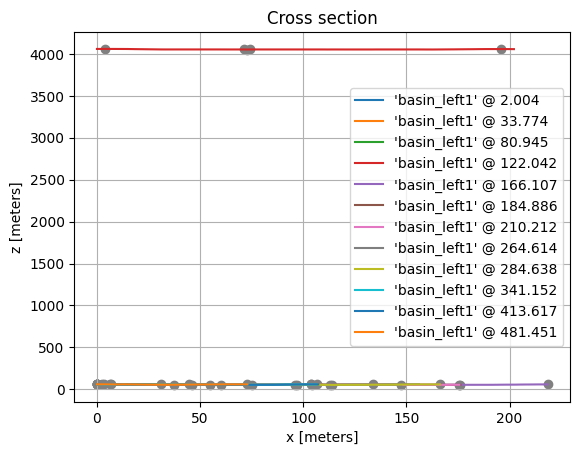

In [16]:
# Plot all cross sections part of the new collection.
ax = new_xns11.plot(with_marker_labels=False)

### Plotting cross sections with GeoPandas

<Axes: >

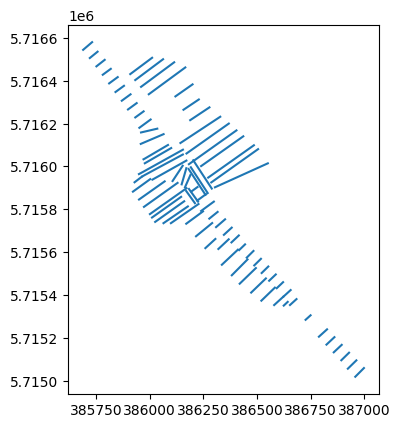

In [17]:
# You can convert xsections into a GeoDataframe. Note that this requires installing GeoPandas seperately.
gdf = xns.to_geopandas()
gdf.plot()

<Axes: >

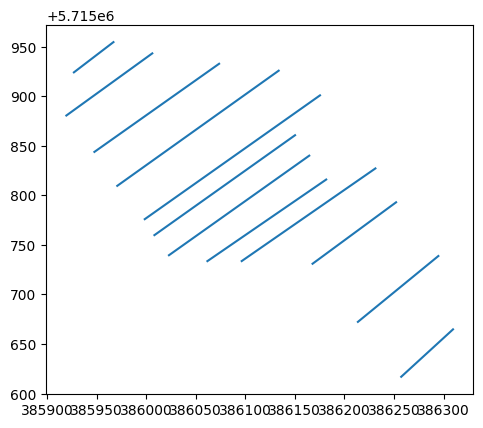

In [18]:
# You can use convert any subset to a GeoDataFrame.
subset = Xns11(xns.sel(location_id="basin_left1"))
subset.to_geopandas().plot()

<Axes: >

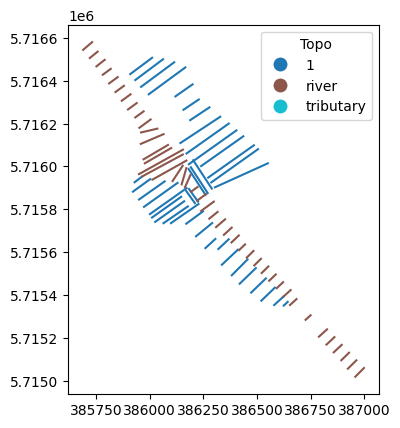

In [19]:
# This xns11 file has three topo ids, let's get an overview of where they are located.
gdf = xns.to_geopandas()
gdf.plot(column="topo_id", legend=True, legend_kwds={"title": "Topo"})

In [20]:
# You can check for overlapping cross sections by seeing if there's duplicate geometries.
# Here there's no duplicates, however, we notice a number of cross sections have no coordinates.
# This can be the case where cross section coordinates are not defined in the xns11 file. For example,
# sometimes coordinates are excluded, then MIKE+ will estimate the coordinates based on the river geometry,
# cross section chainage, and the river's centerline.
gdf[gdf.geometry.duplicated()]

,location_id,chainage,topo_id,geometry
37,link_basin_left,64.000,1,LINESTRING EMPTY
38,link_basin_right,0.000,1,LINESTRING EMPTY
39,link_basin_right,18.000,1,LINESTRING EMPTY
43,link_basin_right,80.400,1,LINESTRING EMPTY
45,river,53126.750,river,LINESTRING EMPTY
46,river,53128.000,river,LINESTRING EMPTY
81,river,54715.000,river,LINESTRING EMPTY
83,river,54800.000,river,LINESTRING EMPTY
84,river,54812.900,river,LINESTRING EMPTY
91,tributary,50.000,tributary,LINESTRING EMPTY


<Axes: >

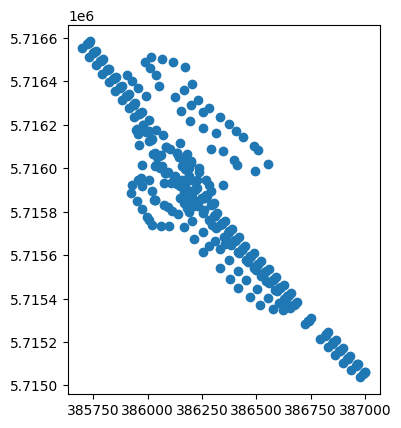

In [21]:
# Plot all of the markers.
xns.to_geopandas(mode='markers').plot(legend=True)

<Axes: >

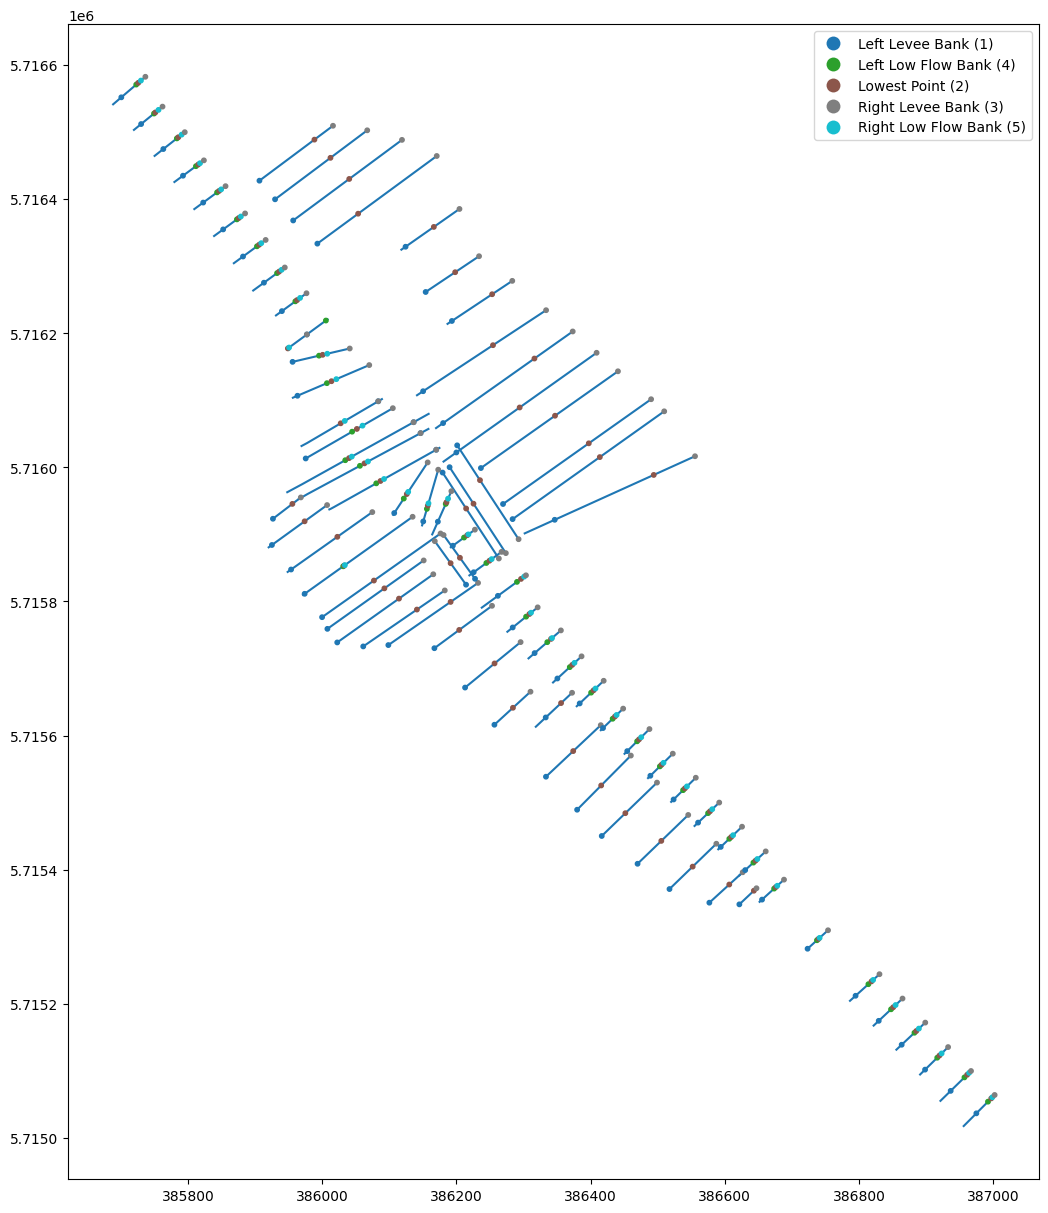

In [22]:
# Plot markers on top of cross sections.

gdf1 = xns.to_geopandas(mode='sections')
gdf2 = xns.to_geopandas(mode='markers')

ax = gdf1.plot(figsize=(15, 15))

gdf2.plot(ax=ax, column="marker_label", markersize=10, zorder=10, legend=True)